In [79]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import sklearn.linear_model
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

os.sys.path.append("C:\\Users\\mplitt\\MightyMorphingPhotonRangers\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [3]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]
print(sess['data file'])

G:\My Drive\\VR_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout_2.sqlite


In [77]:
VRDat,C, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
cmax = np.mean(C,axis=0)
print(cmax.shape)
C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))


G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0
(611,)


In [80]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
#S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=10)
#C_trial_mat = np.nanmean(C_trial_mat,axis=1)

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:256: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:257: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [6]:
np.isnan(C_trial_mat).sum()

87984

In [81]:

C_trial_Ncat = np.reshape(C_trial_mat,[C_trial_mat.shape[0],-1])

In [82]:
np.isnan(C_trial_Ncat).sum()

87984

In [9]:
print(C_trial_Ncat.shape)

(120, 27495)


In [72]:
from cv import masked_pca

In [83]:
U,Vt,train_err = masked_pca(np.copy(C_trial_Ncat),6,nonneg=True)

0 1.2900958
1 1.2339289
2 1.2069808
3 1.1974887
4 1.1928229
5 1.1896734
6 1.1874651
7 1.1860002
8 1.1850882
9 1.1845276
10 1.1841395
11 1.1838586
12 1.1836522


KeyboardInterrupt: 

0.0 8.883497413075636
nan nan


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


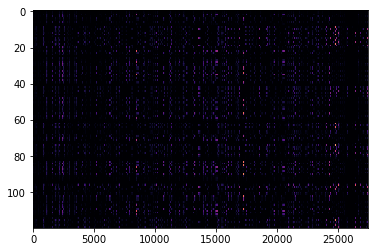

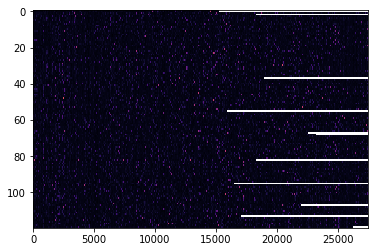

In [12]:
f,ax = plt.subplots()
ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

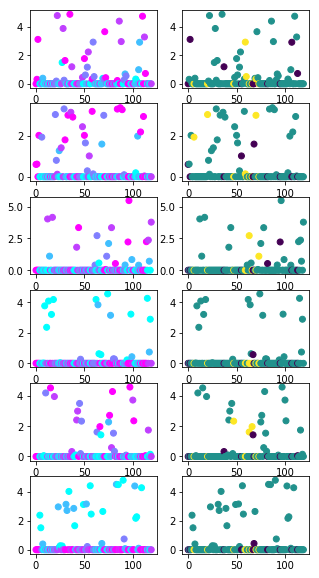

In [13]:
f,ax = plt.subplots(U.shape[1],2,figsize=[5,10])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    #ax[factor].set_ylim([0,2])

(120, 45, 611)
(120,)
[-1.13686838e-13 -1.13686838e-13 -7.81597009e-14  2.27373675e-13
  0.00000000e+00 -2.27373675e-13  4.54747351e-13  0.00000000e+00
  7.10542736e-15  0.00000000e+00  1.13686838e-13 -5.68434189e-14
 -1.13686838e-13  2.27373675e-13  2.27373675e-13  1.13686838e-13
  0.00000000e+00 -5.68434189e-14 -1.13686838e-13  0.00000000e+00
  5.68434189e-14 -1.13686838e-13  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -2.27373675e-13  0.00000000e+00  5.68434189e-14
  0.00000000e+00 -1.70530257e-13  1.13686838e-13  5.68434189e-14
 -1.13686838e-13 -5.68434189e-14  1.13686838e-13 -2.27373675e-13
  4.97379915e-14  1.13686838e-13 -1.13686838e-13  0.00000000e+00
  0.00000000e+00  5.68434189e-14  0.00000000e+00  1.13686838e-13
 -1.13686838e-13  1.42108547e-14  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -5.68434189e-14  0.00000000e+00  0.00000000e+00
 -5.68434189e-14  2.84217094e-14 -1.13686838e-13 -2.27373675e-13
  2.27373675e-13 -1.13686838e-13 -2.27373675e-13  0.00000000e+00
  0

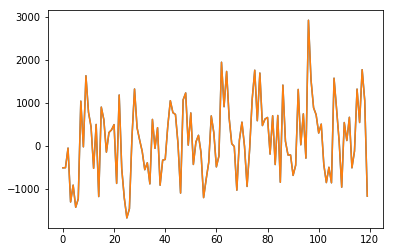

In [14]:
print(C_trial_mat.shape)
trialAct=np.nansum(np.nansum(C_trial_mat,axis=-1),axis=-1)
print(trialAct.shape)
f,ax = plt.subplots()
ax.plot(trialAct)
ax.plot(np.nansum(C_trial_Ncat,axis=-1))
print(trialAct-np.nansum(C_trial_Ncat,axis=-1))

In [15]:
os.sys.path.append("C:\\Users\\mplitt\\nmftools-master\\nmftools")
import ensemble as nmf


In [70]:
print(ranks)

NameError: name 'ranks' is not defined

In [ ]:
data = np.copy(C_trial_Ncat)
u,vt,train_err = masked_pca(data,50,nonneg=False)


0 0.92521256
1 0.8231122
2 0.83007973
3 0.85214186
4 0.87959105
5 0.9096646
6 0.94122744
7 0.9738466
8 1.0073639


In [75]:
reslist = []
for r in range(50):
    print(r)
    resid = np.memmap(os.path.join("E:\\","resid.dat"),dtype='float32',mode='r+',shape=tuple(data.shape))
    resid = np.dot(u[:, :r], vt[:r,:])-data
    resid = np.sqrt(np.nanmean(resid**2))
    reslist.append(resid)
#     results[r]['svd_rmse'] = resid

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


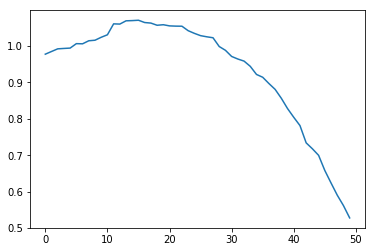

In [76]:
f,ax = plt.subplots()
ax.plot(reslist)

In [55]:
results = nmf.fit_ensemble_masked(np.copy(C_trial_Ncat),np.arange(1,10),n_replicates=5)

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
0 0.9498317
1 0.9452633
2 0.94195324
3 0.94099724
4 0.94078356
5 0.94069105
6 0.9406559
7 0.94064367
8 0.94063973
9 0.940639
10 0.9406385
11 0.9406386
12 0.94063854
13 0.9406386
14 0.9406385
15 0.9406386
16 0.9406385
17 0.9406384
18 0.94063836
19 0.9406384
20 0.9406385
21 0.9406386
22 0.9406386
23 0.9406386
24 0.94063854
25 0.9406386
26 0.9406386
27 0.9406386
28 0.94063854
29 0.94063854
30 0.94063854
31 0.94063854
32 0.94063854
33 0.94063854
34 0.94063854
35 0.94063854
36 0.94063854
37 0.94063854
38 0.94063854
39 0.94063854
40 0.94063854
41 0.94063854
42 0.94063854
43 0.94063854
44 0.94063854
45 0.94063854
46 0.94063854
47 0.94063854
48 0.94063854
49 0.94063854
replicate 1
0 0.94984215
1 0.94509184
2 0.94210064
3 0.94127816
4 0.94092846
5 0.9407524
6 0.94067824
7 0.9406511
8 0.9406419
9 0.9406394
10 0.9406386
11 0.94063854
12 0.9406385
13 0.9406385
14 0.94063836
15 0.94063824
16 0.9406385
17 0.94063836
18 0.94063836
19 0.94063836
20 0.9406384
21 0.94063854
22 0.9406386
23 0

 11%|█████████▏                                                                         | 1/9 [04:43<37:49, 283.71s/it]

replicate 0
0 0.94283414
1 0.9248778
2 0.92133284
3 0.9207168
4 0.92058784
5 0.92053634
6 0.9205152
7 0.92050666
8 0.92050296
9 0.920502
10 0.92050153
11 0.92050123
12 0.92050123
13 0.9205013
14 0.92050105
15 0.92050105
16 0.92050093
17 0.9205009
18 0.92050093
19 0.92050093
20 0.920501
21 0.92050105
22 0.9205011
23 0.9205012
24 0.9205012
25 0.9205012
26 0.9205011
27 0.9205011
28 0.9205011
29 0.9205011
30 0.9205011
31 0.9205011
32 0.9205011
33 0.9205011
34 0.9205011
35 0.9205011
36 0.9205011
37 0.9205011
38 0.9205011
39 0.9205011
40 0.9205011
41 0.9205011
42 0.9205011
43 0.9205011
44 0.9205011
45 0.9205011
46 0.9205011
47 0.9205011
48 0.9205011
49 0.9205011
replicate 1
0 0.9454153
1 0.93602157
2 0.92957395
3 0.925016
4 0.9241641
5 0.9238927
6 0.92370224
7 0.92352337
8 0.92332387
9 0.92308664
10 0.92280483
11 0.9224802
12 0.92212564
13 0.9217671
14 0.92143345
15 0.9211477
16 0.920922
17 0.9207563
18 0.92064416
19 0.92057484
20 0.9205358
21 0.92051625
22 0.9205071
23 0.9205034
24 0.920501

 22%|██████████████████▍                                                                | 2/9 [15:19<45:24, 389.19s/it]

replicate 0
0 0.94104934
1 0.9161619
2 0.90656865
3 0.90408754
4 0.90319943
5 0.9029214
6 0.902817
7 0.90277326
8 0.902754
9 0.9027453
10 0.90274096
11 0.9027388
12 0.9027376
13 0.9027372
14 0.902737
15 0.9027367
16 0.90273696
17 0.9027367
18 0.9027366
19 0.9027365
20 0.9027364
21 0.9027367
22 0.9027367
23 0.90273666
24 0.9027367
25 0.90273666
26 0.90273684
27 0.9027368
28 0.90273654
29 0.9027367
30 0.9027366
31 0.90273654
32 0.9027367
33 0.90273684
34 0.9027367
35 0.9027367
36 0.9027367
37 0.90273666
38 0.9027367
39 0.90273666
40 0.90273666
41 0.90273666
42 0.90273666
43 0.90273666
44 0.90273666
45 0.90273666
46 0.90273666
47 0.90273666
48 0.90273666
49 0.90273666
replicate 1
0 0.9370834
1 0.91629046
2 0.911621
3 0.9085464
4 0.9057597
5 0.9041499
6 0.9034347
7 0.9031075
8 0.9029394
9 0.9028471
10 0.9027963
11 0.9027687
12 0.9027538
13 0.9027458
14 0.90274143
15 0.9027394
16 0.90273815
17 0.9027373
18 0.90273714
19 0.90273666
20 0.90273696
21 0.90273696
22 0.90273684
23 0.9027367
24 0.

 33%|███████████████████████████▋                                                       | 3/9 [28:22<50:45, 507.50s/it]

replicate 0
0 0.93581593
1 0.9117782
2 0.8953815
3 0.8886974
4 0.8867247
5 0.88643855
6 0.88631
7 0.886246
8 0.88621306
9 0.8861963
10 0.8861874
11 0.8861826
12 0.8861806
13 0.88617915
14 0.88617855
15 0.88617814
16 0.8861776
17 0.8861777
18 0.8861776
19 0.8861775
20 0.8861775
21 0.8861774
22 0.8861774
23 0.88617736
24 0.8861774
25 0.8861771
26 0.8861772
27 0.8861771
28 0.88617736
29 0.8861773
30 0.8861772
31 0.88617736
32 0.8861774
33 0.8861774
34 0.8861774
35 0.88617736
36 0.88617736
37 0.88617736
38 0.88617736
39 0.88617736
40 0.88617736
41 0.88617736
42 0.88617736
43 0.88617736
44 0.8861774
45 0.8861774
46 0.8861774
47 0.8861774
48 0.8861774
49 0.8861774
replicate 1
0 0.93493444
1 0.903302
2 0.8958771
3 0.8929456
4 0.8911228
5 0.89068
6 0.8905601
7 0.8904806
8 0.89041543
9 0.8903555
10 0.89029723
11 0.8902386
12 0.8901771
13 0.8901091
14 0.89003134
15 0.88994026
16 0.88983065
17 0.8896985
18 0.8895341
19 0.8893232
20 0.8890484
21 0.88868177
22 0.88820076
23 0.8876368
24 0.887071
25

 44%|████████████████████████████████████▉                                              | 4/9 [43:23<52:08, 625.66s/it]

replicate 0
0 0.93343955
1 0.89810973
2 0.88585573
3 0.88328165
4 0.882158
5 0.88164926
6 0.88147604
7 0.8813119
8 0.8811002
9 0.8807664
10 0.8801873
11 0.87922657
12 0.8781013
13 0.87753797
14 0.8772838
15 0.87701666
16 0.87668645
17 0.87625426
18 0.875714
19 0.87512183
20 0.8745845
21 0.8742291
22 0.87404877
23 0.87396747
24 0.87393117
25 0.87391424
26 0.87390655
27 0.87390286
28 0.8739006
29 0.8738998
30 0.87389934
31 0.87389916
32 0.8738987
33 0.8738989
34 0.8738989
35 0.87389886
36 0.8738987
37 0.87389886
38 0.8738987
39 0.8738987
40 0.8738986
41 0.8738987
42 0.8738986
43 0.8738987
44 0.8738987
45 0.8738987
46 0.8738985
47 0.8738986
48 0.8738986
49 0.8738985
replicate 1
0 0.9355453
1 0.900729
2 0.88134855
3 0.8777904
4 0.87639076
5 0.8752684
6 0.87439585
7 0.8737228
8 0.87326264
9 0.87297785
10 0.8728194
11 0.87274736
12 0.8727152
13 0.8727002
14 0.87269396
15 0.8726909
16 0.87268955
17 0.87268883
18 0.8726886
19 0.87268823
20 0.87268823
21 0.87268835
22 0.8726882
23 0.8726882
24 

 56%|█████████████████████████████████████████████                                    | 5/9 [1:00:15<49:26, 741.58s/it]

replicate 0
0 0.932631
1 0.8960806
2 0.8709319
3 0.8667439
4 0.8651505
5 0.86471075
6 0.8645841
7 0.86449873
8 0.8644225
9 0.8643482
10 0.86427784
11 0.86421514
12 0.86416245
13 0.86412114
14 0.864089
15 0.86406493
16 0.86404574
17 0.86402965
18 0.8640151
19 0.8640011
20 0.8639875
21 0.86397433
22 0.8639599
23 0.8639456
24 0.86393076
25 0.86391574
26 0.8639009
27 0.863886
28 0.863872
29 0.8638592
30 0.86384726
31 0.863837
32 0.8638285
33 0.86382264
34 0.86381847
35 0.863816
36 0.86381453
37 0.86381346
38 0.8638129
39 0.86381257
40 0.86381215
41 0.863812
42 0.8638119
43 0.8638121
44 0.86381215
45 0.863812
46 0.86381215
47 0.86381215
48 0.86381215
49 0.8638119
replicate 1
0 0.9270636
1 0.884026
2 0.8693689
3 0.8646654
4 0.86263853
5 0.86170787
6 0.86107546
7 0.86063516
8 0.8603993
9 0.86029047
10 0.86024386
11 0.86022717
12 0.86022335
13 0.8602245
14 0.86022645
15 0.86022854
16 0.86023015
17 0.86023134
18 0.8602322
19 0.86023307
20 0.8602334
21 0.86023366
22 0.8602337
23 0.8602339
24 0.8

 67%|██████████████████████████████████████████████████████                           | 6/9 [1:18:45<42:36, 852.08s/it]

replicate 0
0 0.92945373
1 0.8918389
2 0.87412965
3 0.86134475
4 0.8526923
5 0.85052234
6 0.84984213
7 0.8495821
8 0.84947664
9 0.8494305
10 0.8494075
11 0.84939486
12 0.8493874
13 0.8493823
14 0.849379
15 0.8493768
16 0.84937507
17 0.84937376
18 0.8493729
19 0.8493719
20 0.8493716
21 0.84937114
22 0.84937096
23 0.8493706
24 0.8493704
25 0.8493705
26 0.8493703
27 0.84937024
28 0.8493701
29 0.8493701
30 0.8493699
31 0.84936994
32 0.8493699
33 0.84936976
34 0.8493696
35 0.84936976
36 0.84936965
37 0.84936965
38 0.84936965
39 0.84936965
40 0.84936965
41 0.84936965
42 0.84936965
43 0.84936947
44 0.84936947
45 0.84936965
46 0.84936965
47 0.8493697
48 0.84936976
49 0.8493698
replicate 1
0 0.92722386
1 0.8823127
2 0.868644
3 0.8615862
4 0.85951537
5 0.8588184
6 0.85842
7 0.85810506
8 0.85778093
9 0.85741407
10 0.857022
11 0.8566651
12 0.8564056
13 0.8562361
14 0.85611963
15 0.8560397
16 0.8559846
17 0.8559482
18 0.85592616
19 0.85591286
20 0.85590434
21 0.8558994
22 0.85589594
23 0.8558934
24

 78%|███████████████████████████████████████████████████████████████                  | 7/9 [1:39:04<32:04, 962.02s/it]

replicate 0
0 0.9242397
1 0.8721325
2 0.8524048
3 0.8466264
4 0.839853
5 0.837328
6 0.8370348
7 0.8369951
8 0.83699226
9 0.8369924
10 0.8369924
11 0.83699244
12 0.8369924
13 0.8369923
14 0.83699214
15 0.83699214
16 0.8369922
17 0.83699226
18 0.836992
19 0.836992
20 0.836992
21 0.836992
22 0.836992
23 0.836992
24 0.83699197
25 0.83699197
26 0.83699197
27 0.83699197
28 0.83699197
29 0.83699197
30 0.83699197
31 0.83699197
32 0.83699197
33 0.83699197
34 0.83699197
35 0.83699197
36 0.83699197
37 0.83699197
38 0.83699197
39 0.83699197
40 0.83699197
41 0.83699197
42 0.83699197
43 0.83699197
44 0.83699197
45 0.83699197
46 0.83699197
47 0.83699197
48 0.83699197
49 0.83699197
replicate 1
0 0.91930395
1 0.8620471
2 0.84696156
3 0.8431873
4 0.8412766
5 0.8395247
6 0.83812386
7 0.837518
8 0.8372343
9 0.83709663
10 0.8370352
11 0.83701074
12 0.8370012
13 0.836997
14 0.8369948
15 0.8369937
16 0.836993
17 0.8369926
18 0.8369923
19 0.8369923
20 0.83699214
21 0.836992
22 0.83699214
23 0.83699185
24 0.83

 89%|███████████████████████████████████████████████████████████████████████         | 8/9 [2:01:08<17:50, 1070.49s/it]

replicate 0
0 0.918776
1 0.8568117
2 0.8387012
3 0.83482873
4 0.83380866
5 0.83340704
6 0.83314914
7 0.8329243
8 0.8327223
9 0.8325322
10 0.8323372
11 0.83210206
12 0.83177626
13 0.8312672
14 0.8305415
15 0.8298674
16 0.8294924
17 0.82924956
18 0.82902527
19 0.8287579
20 0.82841927
21 0.82801306
22 0.8275799
23 0.8271985
24 0.82691354
25 0.8267276
26 0.8266173
27 0.8265556
28 0.826522
29 0.8265053
30 0.826497
31 0.82649344
32 0.8264917
33 0.826491
34 0.8264901
35 0.82649
36 0.8264898
37 0.82648975
38 0.8264895
39 0.82648957
40 0.8264896
41 0.8264895
42 0.8264896
43 0.8264894
44 0.8264894
45 0.8264894
46 0.8264894
47 0.8264894
48 0.8264894
49 0.8264894
replicate 1
0 0.9144277
1 0.85498923
2 0.83316904
3 0.82797754
4 0.8270691
5 0.8268904
6 0.8268439
7 0.82682633
8 0.8268145
9 0.82680386
10 0.8267924
11 0.82678074
12 0.8267685
13 0.82675606
14 0.82674366
15 0.8267303
16 0.8267172
17 0.8267034
18 0.8266895
19 0.8266755
20 0.8266613
21 0.82664686
22 0.82663167
23 0.8266162
24 0.82660025
25

100%|████████████████████████████████████████████████████████████████████████████████| 9/9 [2:25:07<00:00, 1181.09s/it]


0 0.89114106
1 0.81754184
2 0.79349744
3 0.78781015
4 0.78603303
5 0.7853087
6 0.78495264
7 0.78475624
8 0.7846395
9 0.78456604
10 0.78451777
11 0.78448385
12 0.7844598
13 0.78444225
14 0.784429
15 0.78441894
16 0.7844114
17 0.78440565
18 0.7844015
19 0.7843981
20 0.7843959
21 0.7843945
22 0.7843932
23 0.7843927
24 0.78439236
25 0.78439254
26 0.78439265
27 0.78439283
28 0.7843933
29 0.7843937
30 0.7843946
31 0.7843951
32 0.784396
33 0.7843965
34 0.78439707
35 0.78439796
36 0.78439844
37 0.7843989
38 0.78439957
39 0.78440005
40 0.78440046
41 0.784401
42 0.78440154
43 0.78440183
44 0.7844023
45 0.78440243
46 0.784403
47 0.78440326
48 0.78440344
49 0.7844039


In [18]:
import plots 

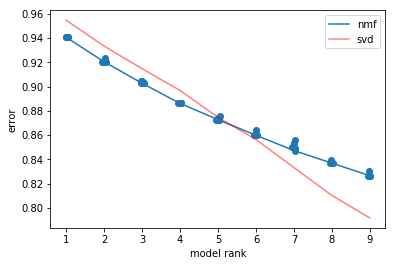

In [56]:
plots.plot_rmse(results)

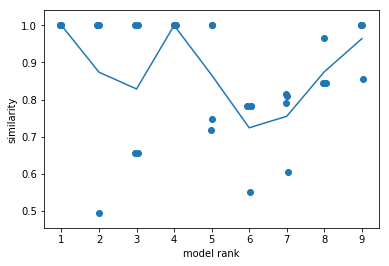

In [57]:
plots.plot_similarity(results)

In [58]:
print(results.keys())
rank = 4

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9])


In [59]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

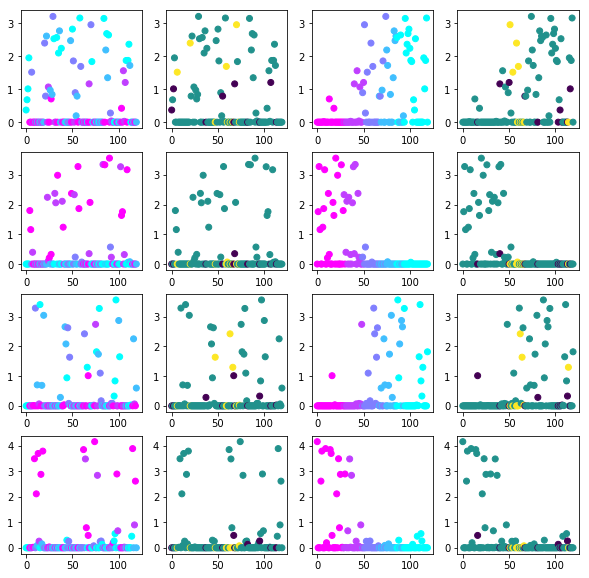

In [60]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=1-trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')
    ax[factor,2].scatter(np.arange(120),U[sort,factor],c=1-trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(120),U[sort,factor],c=trial_info['rewards'][sort]+2*trial_info['omissions'][sort],cmap='viridis')

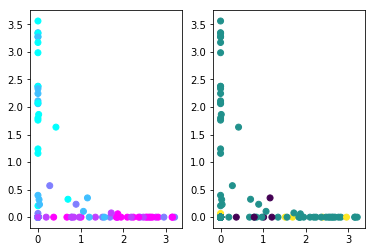

In [61]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards']+2*trial_info['omissions'],cmap='viridis')

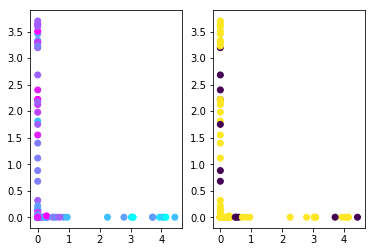

In [48]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[1:,0],U[1:,1],c=trial_info['morphs'][1:]-trial_info['morphs'][0:-1],cmap='cool')
ax[1].scatter(U[1:,0],U[1:,1],c=trial_info['rewards'][0:-1],cmap='viridis')

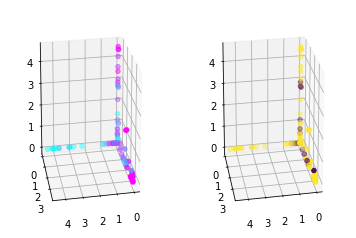

In [49]:
from mpl_toolkits.mplot3d import Axes3D
f= plt.figure()
ax=f.add_subplot(121,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['morphs'],cmap='cool')
ax.view_init(20,80)

ax=f.add_subplot(122,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,3],c=trial_info['rewards'],cmap='viridis')
ax.view_init(20,80)

0.0 8.342571206753687


C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


nan nan


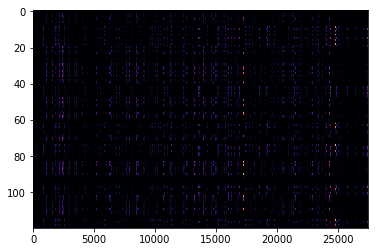

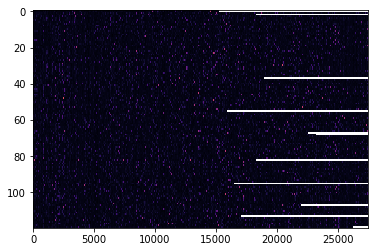

In [62]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
print(np.dot(U,Vt).min(),np.dot(U,Vt).max())
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')
print(C_trial_Ncat.ravel().min(),C_trial_Ncat.ravel().max())

In [63]:
np.isnan(C_trial_Ncat).sum()

87984

In [64]:
print(U.shape)

(120, 4)


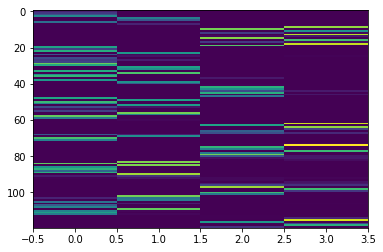

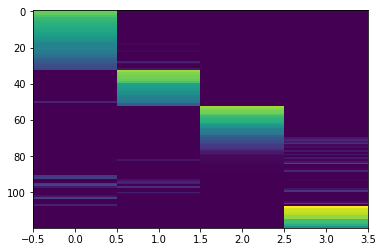

In [65]:
import sklearn.cluster
import sklearn.metrics
import scipy.cluster.hierarchy as sch

D = sk.metrics.pairwise_distances(U)


km = sk.cluster.KMeans(n_clusters=rank).fit(U)

order = []
for col in range(U.shape[1]):

    # arg sort by column value, descending
    colorder = np.flip(np.argsort(U[:,col]),axis=0)
#     print(km.labels_[colorder])
    lbl = km.labels_[colorder[0]]
#     print(lbl)
#     print(U[colorder,col])
#     print(colorder[km.labels_[colorder]==lbl])
#     print(U[colorder[km.labels_[colorder]==lbl],col])
    # find all labels that have the same as first index
    order.extend(colorder[km.labels_[colorder]==lbl])
    

    

# centroids = np.linalg.norm(km.cluster_centers_-km.cluster_centers_[0,:],axis=1)
# # centroids = centroids-centroids[0]
# colOrder=np.argsort(centroids)
# inds = np.argsort(km.labels_)

f,ax = plt.subplots()
ax.imshow(U,aspect='auto')

# order = np.flip(np.argsort(U[:,0]),axis=0)
Uk=U[order,:]
# Ukc = Uk[:,colOrder]
f,ax = plt.subplots()
ax.imshow(Uk,aspect='auto')

In [66]:
Vmat = np.reshape(Vt,[rank,C_trial_mat.shape[1],C_trial_mat.shape[2]])

C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\mplitt\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


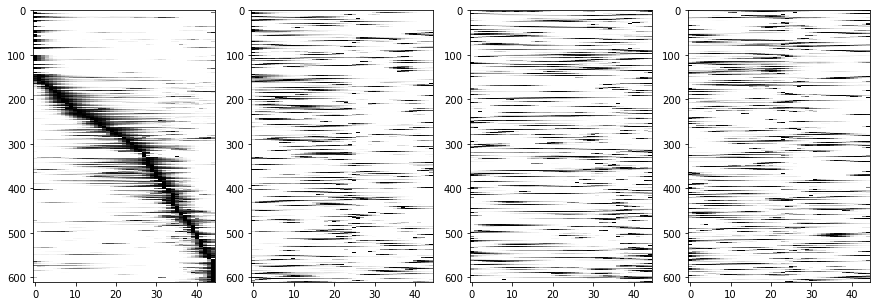

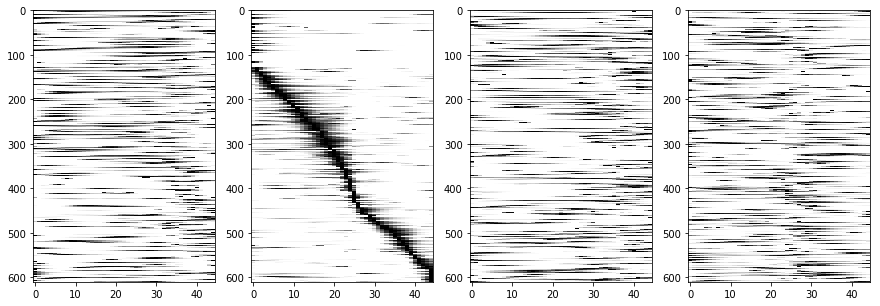

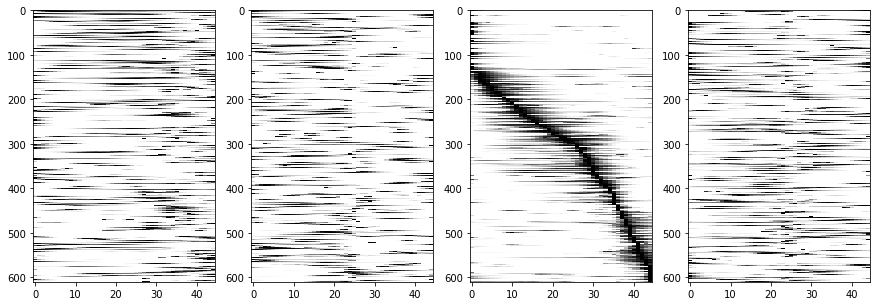

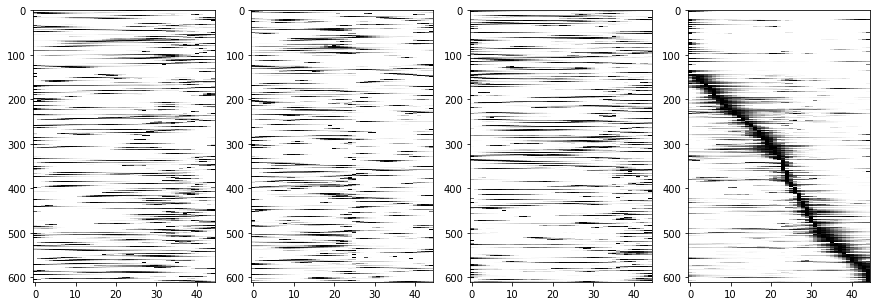

In [67]:
getSort = lambda fr : np.argsort(np.argmax(fr,axis=0))
#factorOrder = [0,1,3,2,4]
for k in range(rank):
    fr_k = np.squeeze(Vmat[k,:,:])
    for col in range(fr_k.shape[1]):
        fr_k[:,col]/=fr_k[:,col].max()
    f,ax = plt.subplots(1,rank,figsize=[15,5])
    sort = getSort(fr_k)
    for j in range(rank):
        fr_j = np.squeeze(Vmat[j,:,:])
        for col in range(fr_j.shape[1]):
            fr_j[:,col]/=fr_j[:,col].max()
            
        ax[j].imshow(fr_j[:,sort].T,cmap='Greys',aspect='auto')
#     fr_ks = fr_k[:,getSort(fr_k)]
#     ax.imshow(fr_ks.T,cmap='Greys',aspect='auto')